In [191]:
# #!/usr/bin/env python

# # make sure to install these packages before running:
# # pip install pandas
# # pip install sodapy

# import pandas as pd
# from sodapy import Socrata

# # Unauthenticated client only works with public data sets. Note 'None'
# # in place of application token, and no username or password:
# # client = Socrata("data.wa.gov", None)

# # Example authenticated client (needed for non-public datasets):
# client = Socrata("data.wa.gov",
#                  "9Wd0idzQuFB6INKzZXZH63zT2",
#                  username="dzjfrank@gmail.com",
#                  password="Qwer1234")

# # First 2000 results, returned as JSON from API / converted to Python list of
# # dictionaries by sodapy.
# results = client.get("brw6-jymh", limit=2000, where = "model_year > 2020", select = "start_of_month, make, model, model_year, county")

# # Convert to pandas DataFrame
# results_df = pd.DataFrame.from_records(results)

Overall Electric Vehicle Trends: Analyze the number of electric vehicles sold over the years in the dataset.

Tesla's Market Position: Examine Tesla's share among electric vehicles, including trends in sales over time.

Comparison with Other Electric Vehicle Makes: Compare Tesla with other electric vehicle manufacturers in terms of sales and market share.

Tesla Model Trends: Break down Tesla's sales by model to understand the most popular models.

Geographical Distribution: Look at the geographical distribution of electric vehicle and Tesla sales.


<!-- import os
import requests

current_file_path = os.path.abspath(__file__)
project_root = os.path.dirname(os.path.dirname(current_file_path))

data_raw_folder = os.path.join(project_root, 'data', 'raw')

# create data/raw/ folder
if not os.path.exists(data_raw_folder):
    os.makedirs(data_raw_folder)

# download data
data_file_path = os.path.join(data_raw_folder, 'vehicleData.csv')

url = r'https://data.wa.gov/api/views/brw6-jymh/rows.csv?accessType=DOWNLOAD'
r = requests.get(url)
with open(data_file_path, 'wb') as f:
    f.write(r.content)

print('Data downloaded and saved to {}'.format(data_file_path)) -->


In [192]:
import pandas as pd


In [193]:
# chunk_size = 2000000
# cols_to_use = ['Make', 'Model', "Model Year",]
# chunks = pd.read_csv('../data/raw/vehicleData.csv', usecols=cols_to_use, chunksize=chunk_size)


In [194]:
# df = pd.read_csv('../data/raw/vehicleData.csv',)

# Only focous on data 2020 to 2023

In [195]:
# df["Transaction Year"] = df["Transaction Month and Year"].str[-4:].astype(int)

In [196]:
# df2 = df[df["Transaction Year"] > 2018]

In [197]:
# df3 = df2[df2["Transaction Year"] < 2024]

In [198]:
# df4 = df3[df3["Transaction Type"] == "Original Registration"]

In [199]:
# df4.to_csv('../data/raw/vehicleData2019_2023_reg.csv', index=False)

In [200]:
# data = df4

In [201]:
data = pd.read_csv('../data/raw/vehicleData2019_2023_reg.csv')

/var/folders/08/h1s377jj0hs79v0t6mc5wfgc0000gn/T/ipykernel_91756/921533195.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/raw/vehicleData2019_2023_reg.csv')


In [202]:
# Filter the dataset for electric vehicles
electric_vehicles = data[data['Fuel Type Primary'].str.lower() == 'electric']

# Count the number of electric vehicles sold per year
ev_sales_by_year = electric_vehicles['Transaction Month and Year'].str[-4:].value_counts().sort_index()

ev_sales_by_year


Transaction Month and Year
2020    14670
2021    24823
2022    33716
2023    54522
Name: count, dtype: int64

In [203]:
# Filter the dataset for Tesla vehicles
tesla_vehicles = electric_vehicles[electric_vehicles['Make'].str.upper() == 'TESLA']

# Count the number of Tesla vehicles sold per year
tesla_sales_by_year = tesla_vehicles['Transaction Month and Year'].str[-4:].value_counts().sort_index()

# Calculate Tesla's market share among electric vehicles by year
tesla_market_share_by_year = (tesla_sales_by_year / ev_sales_by_year) * 100

tesla_sales_by_year, tesla_market_share_by_year


(Transaction Month and Year
 2020     8148
 2021    12864
 2022    16661
 2023    24597
 Name: count, dtype: int64,
 Transaction Month and Year
 2020    55.541922
 2021    51.822906
 2022    49.415708
 2023    45.113899
 Name: count, dtype: float64)

In [204]:
# Get sales by make for all electric vehicles
ev_sales_by_make = electric_vehicles.groupby('Make')['Transaction Month and Year'].count().sort_values(ascending=False)

# Calculate market share for each make
total_ev_sales = electric_vehicles['Transaction Month and Year'].count()
ev_market_share_by_make = (ev_sales_by_make / total_ev_sales) * 100

ev_sales_by_make.head(10), ev_market_share_by_make.head(10)


(Make
 TESLA         62270
 CHEVROLET      7431
 KIA            5689
 NISSAN         5598
 BMW            5572
 FORD           5431
 VOLKSWAGEN     4247
 HYUNDAI        4000
 TOYOTA         3766
 VOLVO          3714
 Name: Transaction Month and Year, dtype: int64,
 Make
 TESLA         48.750891
 CHEVROLET      5.817695
 KIA            4.453891
 NISSAN         4.382648
 BMW            4.362293
 FORD           4.251904
 VOLKSWAGEN     3.324956
 HYUNDAI        3.131581
 TOYOTA         2.948384
 VOLVO          2.907673
 Name: Transaction Month and Year, dtype: float64)

In [205]:
# Analyze Tesla's sales by model
tesla_sales_by_model = tesla_vehicles.groupby('Model')['Transaction Month and Year'].count().sort_values(ascending=False)

tesla_sales_by_model


Model
MODEL Y     32165
MODEL 3     22131
MODEL X      4043
MODEL S      3920
ROADSTER       11
Name: Transaction Month and Year, dtype: int64

In [206]:
# Analyze the geographical distribution of electric vehicle sales, focusing on Tesla
ev_sales_by_county = electric_vehicles.groupby('County')['Transaction Month and Year'].count().sort_values(ascending=False)
tesla_sales_by_county = tesla_vehicles.groupby('County')['Transaction Month and Year'].count().sort_values(ascending=False)

ev_sales_by_county.head(5), tesla_sales_by_county.head(5)


(County
 King         65588
 Snohomish    15171
 Pierce       10284
 Clark         8813
 Kitsap        4079
 Name: Transaction Month and Year, dtype: int64,
 County
 King         34706
 Snohomish     8317
 Pierce        4811
 Clark         3735
 Thurston      1530
 Name: Transaction Month and Year, dtype: int64)

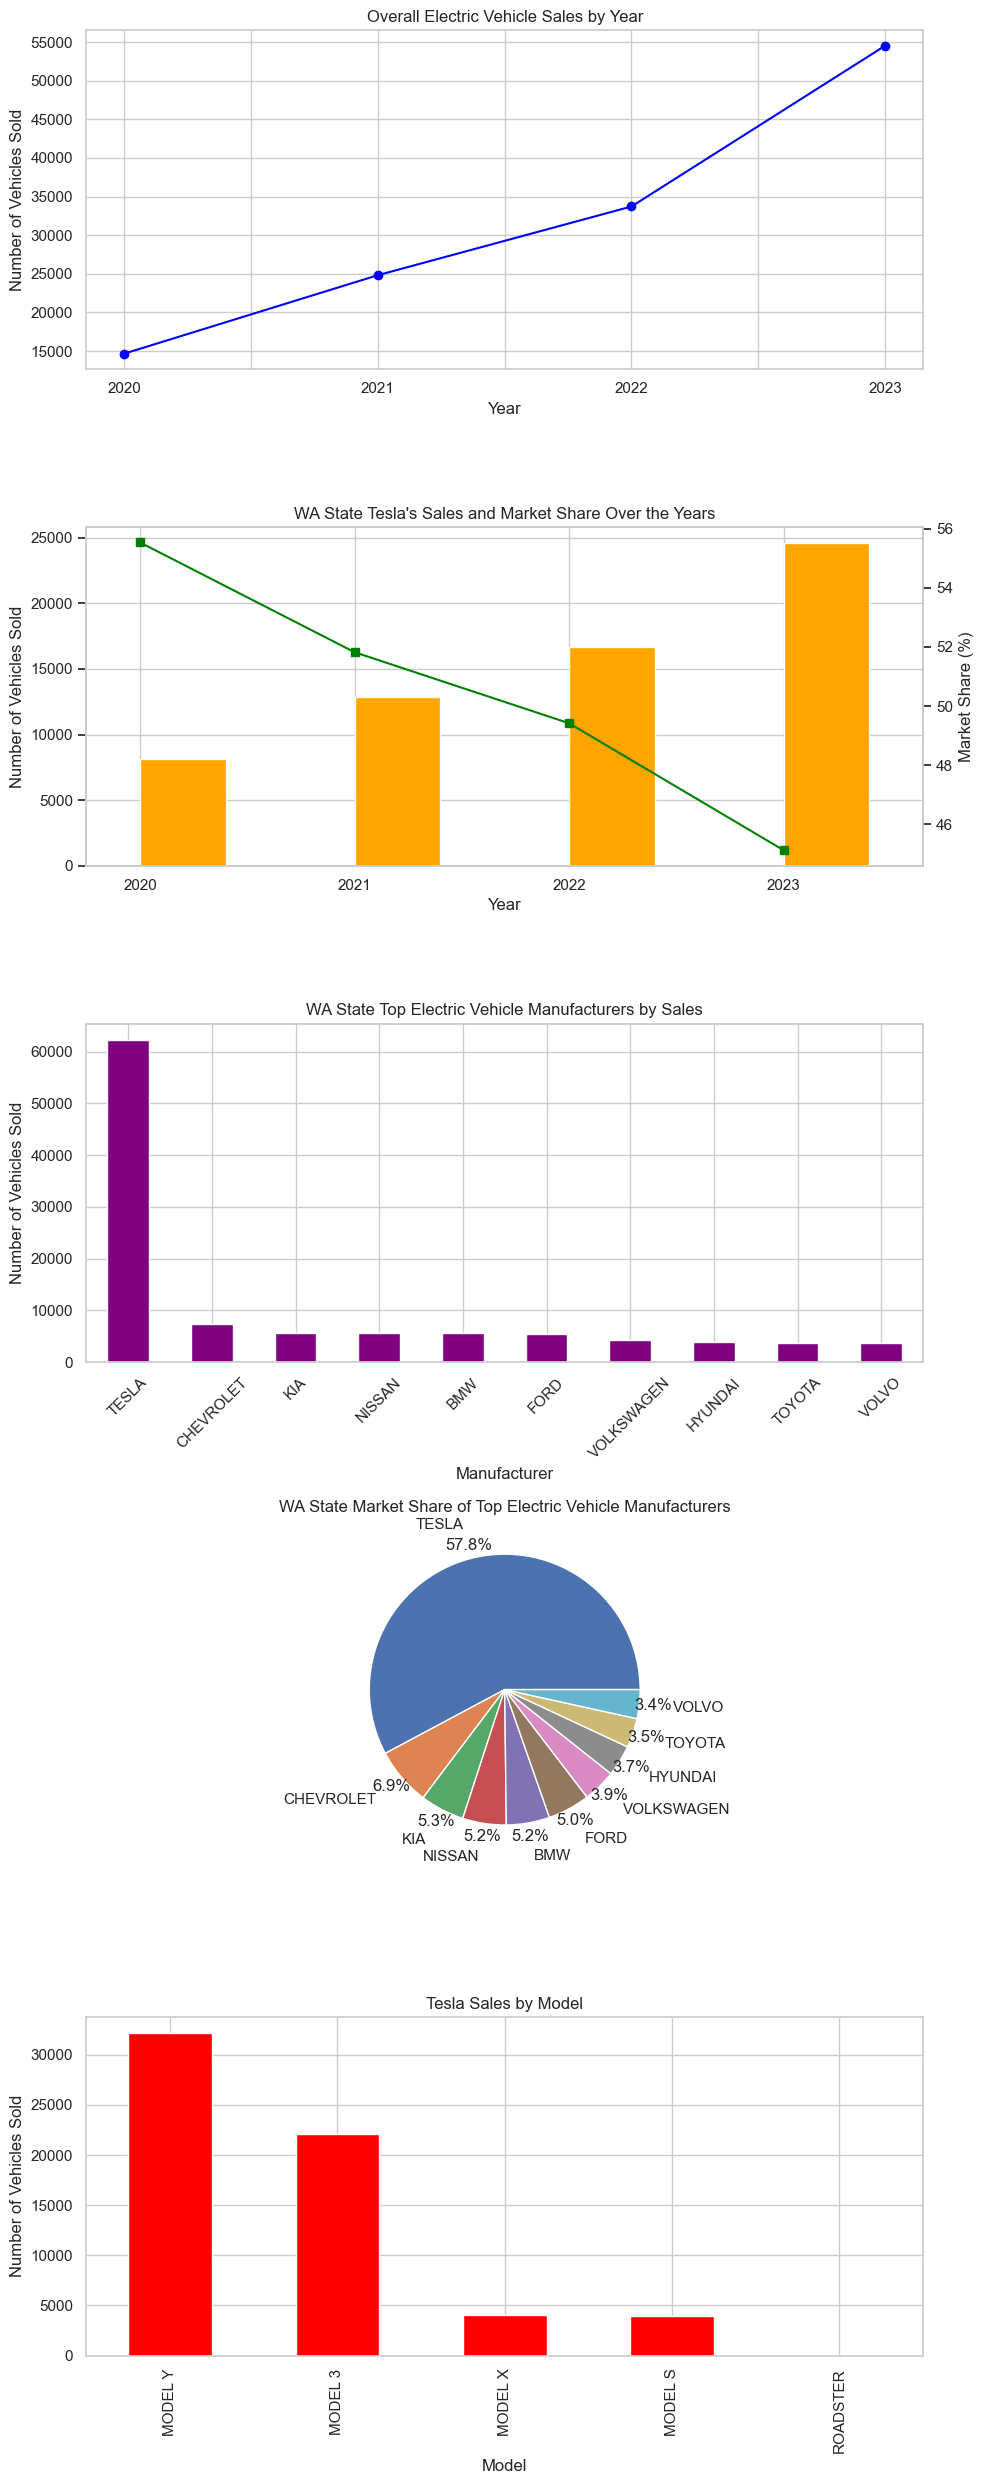

In [234]:
import matplotlib.pyplot as plt

# Setting up the plotting area
fig, ax = plt.subplots(5, 1, figsize=(10, 25))

# Overall Electric Vehicle Trends
ev_sales_by_year.plot(ax=ax[0], marker='o', linestyle='-', color='blue')
ax[0].set_title('Overall Electric Vehicle Sales by Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Vehicles Sold')
ax[0].grid(True)

# Tesla's Market Position (Sales and Market Share)
tesla_sales_by_year.plot(ax=ax[1], kind='bar', color='orange', position=0, width=0.4, label='Sales')
tesla_market_share_by_year.plot(ax=ax[1], secondary_y=True, marker='s', linestyle='-', color='green', label='Market Share')
ax[1].set_title("WA State Tesla's Sales and Market Share Over the Years")
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Vehicles Sold')
ax[1].right_ax.set_ylabel('Market Share (%)')
ax[1].grid(True)

# Comparison with Other Electric Vehicle Makes (Sales)
ev_sales_by_make.head(10).plot(ax=ax[2], kind='bar', color='purple')
ax[2].set_title('WA State Top Electric Vehicle Manufacturers by Sales')
ax[2].set_xlabel('Manufacturer')
ax[2].set_ylabel('Number of Vehicles Sold')
ax[2].tick_params(axis='x', rotation=45)
ax[2].grid(True)

# Comparison with Other Electric Vehicle Makes (Market Share)
ev_market_share_by_make.head(10).plot(ax=ax[3], kind='pie', autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.25)
ax[3].set_title('WA State Market Share of Top Electric Vehicle Manufacturers')
ax[3].set_ylabel('')

# Tesla Model Trends
tesla_sales_by_model.plot(ax=ax[4], kind='bar', color='red')
ax[4].set_title('Tesla Sales by Model')
ax[4].set_xlabel('Model')
ax[4].set_ylabel('Number of Vehicles Sold')
ax[4].grid(True)


plt.tight_layout()
plt.show()


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'MODEL Y'),
  Text(1, 0, 'MODEL 3'),
  Text(2, 0, 'MODEL X'),
  Text(3, 0, 'MODEL S'),
  Text(4, 0, 'ROADSTER')])

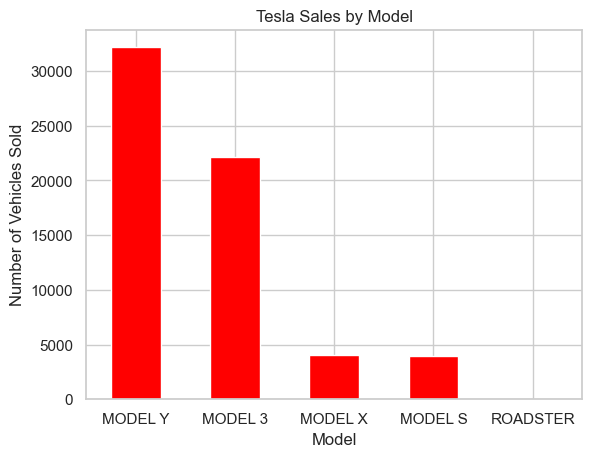

In [208]:
tesla_sales_by_model.plot(kind='bar', color='red')
plt.title('Tesla Sales by Model')
plt.xlabel('Model')
plt.ylabel('Number of Vehicles Sold')
plt.grid(True)
plt.xticks(rotation=0)

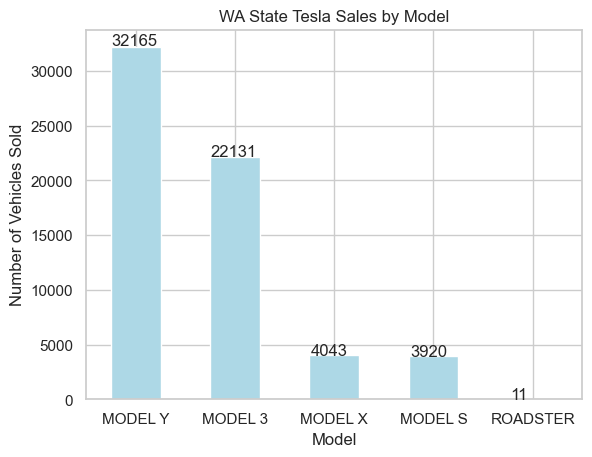

In [235]:
# Plotting the sales of Tesla by model with the count annotated on each bar
tesla_sales_by_model_fig, tesla_sales_by_model_ax = plt.subplots()

tesla_sales_by_model.plot(kind='bar', color='lightblue', ax=tesla_sales_by_model_ax)
tesla_sales_by_model_ax.set_title('WA State Tesla Sales by Model')
tesla_sales_by_model_ax.set_xlabel('Model')
tesla_sales_by_model_ax.set_ylabel('Number of Vehicles Sold')
tesla_sales_by_model_ax.grid(True)
tesla_sales_by_model_ax.set_xticklabels(tesla_sales_by_model.index, rotation=0)

# Annotating the count above each bar
for p in tesla_sales_by_model_ax.patches:
    tesla_sales_by_model_ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


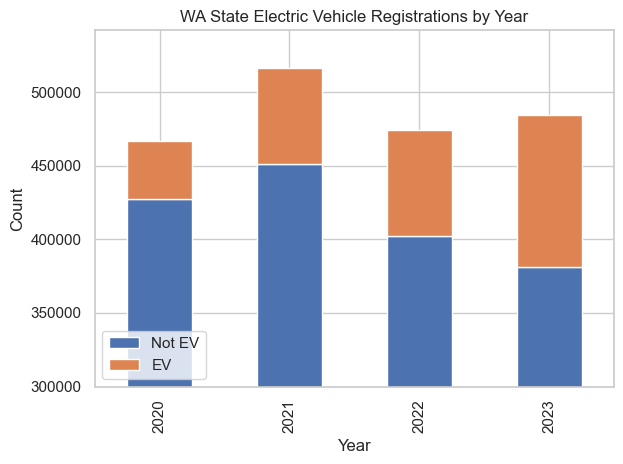

In [226]:
# Assuming the column "Electrification Level" exists and it indicates the electric vehicle status,
# and also assuming "Transaction Year" can be derived from "Transaction Month and Year",
# Let's create these columns and plot as requested.

# Extract the year from "Transaction Month and Year" to create a "Transaction Year" column
data['Transaction Year'] = data['Transaction Month and Year'].str[-4:]

# Assuming "Electrification Level" is equivalent to checking if "Fuel Type Primary" is Electric,
# Let's create a similar "EV" column based on the "Fuel Type Primary"
data['EV'] = data['Electrification Level'].str.contains('Electric', case=False, na=False)

# Now, group by "Transaction Year" and "EV", then plot
data.groupby("Transaction Year")['EV'].value_counts().unstack().plot(kind="bar", stacked=True)
# plt.yscale("log")
plt.title('WA State Electric Vehicle Registrations by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='', labels=['Not EV', 'EV'], loc='lower left')
plt.ylim(bottom=300000)
plt.tight_layout()
plt.show()


In [211]:
data.isna().sum()

Transaction Month and Year                       0
Make                                             0
Model                                            0
Model Year                                       0
Vehicle Color                              1318171
Vehicle Type                                     0
Vehicle Primary Use                              0
Fuel Type Primary                                0
Fuel Type Secondary                        1725332
Gross Vehicle Weight Rating Class           465175
Gross Vehicle Weight Rating Range (lbs)     465175
Electrification Level                            0
Plate Background                                 0
Plate Configuration                              0
Owner Type                                       0
County                                           0
State                                            5
Postal Code                                      0
Transaction Type                                 0
Transaction Channel            

In [212]:
data["Electrification Level"].value_counts()

Electrification Level
ICE (Internal Combustion Engine)                 1662102
BEV (Battery Electric Vehicle)                    104853
HEV (Hybrid Electric Vehicle) - Level Unknown      92424
Strong HEV (Hybrid Electric Vehicle)               53725
PHEV (Plug-in Hybrid Electric Vehicle)             23521
Mild HEV (Hybrid Electric Vehicle)                  5230
Non-Powered                                            5
Name: count, dtype: int64

In [213]:
data["County"].value_counts()

County
King                       545515
Pierce                     212649
Clark                      195159
Snohomish                  181621
Spokane                    138005
Thurston                    76338
Kitsap                      68587
Whatcom                     53339
Benton                      52166
Yakima                      46901
Unknown or Out of State     39337
Cowlitz                     36125
Skagit                      27575
Island                      23931
Lewis                       23019
Franklin                    22326
Grant                       20517
Clallam                     16797
Chelan                      16277
Grays Harbor                15495
Mason                       14875
Walla Walla                 14348
Stevens                     11183
Kittitas                    10157
Whitman                      9904
Klickitat                    8719
Douglas                      8512
Jefferson                    7603
Pacific                      7474
Okanoga

In [214]:
dataEV = data[data["EV"] == True][data[data["EV"] == True]["State"] == "WA"]

In [215]:
dataEV.shape

(278845, 24)

In [216]:
dataEV.head(1)

,Transaction Month and Year,Make,Model,Model Year,Vehicle Color,Vehicle Type,Vehicle Primary Use,Fuel Type Primary,Fuel Type Secondary,Gross Vehicle Weight Rating Class,...,Owner Type,County,State,Postal Code,Transaction Type,Transaction Channel,2020 GEOID,Transaction Count,Transaction Year,EV
77,01/01/2020,FORD,FUSION,2019,NaN,PASSENGER CAR,Passenger,Gasoline,Electric,NaN,...,Individual Owner,King,WA,98198,Original Registration,In-person,5.303303e+10,1,2020,True


In [217]:
dataEV.columns

Index(['Transaction Month and Year', 'Make', 'Model', 'Model Year',
       'Vehicle Color', 'Vehicle Type', 'Vehicle Primary Use',
       'Fuel Type Primary', 'Fuel Type Secondary',
       'Gross Vehicle Weight Rating Class',
       'Gross Vehicle Weight Rating Range (lbs)', 'Electrification Level',
       'Plate Background', 'Plate Configuration', 'Owner Type', 'County',
       'State', 'Postal Code', 'Transaction Type', 'Transaction Channel',
       '2020 GEOID', 'Transaction Count', 'Transaction Year', 'EV'],
      dtype='object')

In [218]:
dataEV_Clean = dataEV[["County", "Transaction Year", "Make", "Model", "Model Year", "Vehicle Type", "Vehicle Primary Use", "Electrification Level", "Owner Type"]]

In [219]:
dataEV_Clean.shape

(278845, 9)

In [220]:
dataEV_Clean.head(1)

,County,Transaction Year,Make,Model,Model Year,Vehicle Type,Vehicle Primary Use,Electrification Level,Owner Type
77,King,2020,FORD,FUSION,2019,PASSENGER CAR,Passenger,Strong HEV (Hybrid Electric Vehicle),Individual Owner


In [221]:
dataEV_Clean.to_csv('../data/raw/vehicleData2019_2023_EVs.csv', index=False)

In [222]:
dataEV_Clean.groupby("County")["Transaction Year"].value_counts().sort_index()

County   Transaction Year
Adams    2020                 22
         2021                 51
         2022                 44
         2023                 62
Asotin   2020                 46
                            ... 
Whitman  2023                316
Yakima   2020                365
         2021                679
         2022                628
         2023                957
Name: count, Length: 160, dtype: int64

In [223]:
df = pd.read_csv('../data/raw/vehicleData2019_2023_EVs.csv')

In [224]:
df.shape

(278845, 9)

In [225]:
df.Make.value_counts()

Make
TOYOTA                         88859
TESLA                          62082
HONDA                          22390
FORD                           15431
KIA                            14144
                               ...  
AIR EASY LLC DBA AVENTURA-X        1
THAMLEV                            1
CRUISE CAR                         1
COLUMBIA                           1
SSR                                1
Name: count, Length: 113, dtype: int64